## Project Title! TBD

## Introduction

- background info
- state my question
- identify/describe dataset used


Sorry, I didn't know how to check the word count for this

Can you predict heart disease dianogsis given a patient's serum cholestoral and resting blood pressure measurements? 

OR:

What type of diagnosis of heart disease will a 60 year old Swiss female with serum chol of 200 have? 


## Preliminary Exploratory Data Analysis


*
*

- Demonstrate reading data into from Web
- Clean and wrangle data!
- Summarize data in at least one table. Why did u pick that one?


In [85]:
library(tidyverse)
library(tidymodels)
set.seed(1)

In [171]:

cleveland_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE) |>
    rename(age = X1, sex = X2, chest_pain = X3, rest_bloodp = X4, chol = X5, fbs = X6, restecg = X7, max_heartrate = X8, 
           exang = X9, oldpeak = X10, slope = X11, numb_vessels = X12, thal = X13, diag_heartdis = X14) 

hungarian_data <- read_csv("data/heart_disease/processed.hungarian.data", col_names = FALSE) |>
    rename(age = X1, sex = X2, chest_pain = X3, rest_bloodp = X4, chol = X5, fbs = X6, restecg = X7, max_heartrate = X8, 
           exang = X9, oldpeak = X10, slope = X11, numb_vessels = X12, thal = X13, diag_heartdis = X14) 

switz_data <- read_csv("data/heart_disease/processed.switzerland.data", col_names = FALSE) |>
    rename(age = X1, sex = X2, chest_pain = X3, rest_bloodp = X4, chol = X5, fbs = X6, restecg = X7, max_heartrate = X8, 
           exang = X9, oldpeak = X10, slope = X11, numb_vessels = X12, thal = X13, diag_heartdis = X14) 

va_data <- read_csv("data/heart_disease/processed.va.data", col_names = FALSE) |>
    rename(age = X1, sex = X2, chest_pain = X3, rest_bloodp = X4, chol = X5, fbs = X6, restecg = X7, max_heartrate = X8, 
           exang = X9, oldpeak = X10, slope = X11, numb_vessels = X12, thal = X13, diag_heartdis = X14) 
slice(hungarian_data, 1:3)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

age,sex,chest_pain,rest_bloodp,chol,fbs,restecg,max_heartrate,exang,oldpeak,slope,numb_vessels,thal,diag_heartdis
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0


In [170]:
cleve_data <- select(cleveland_data, age, sex, chest_pain, rest_bloodp, chol, diag_heartdis)
slice(cleve_data, 1:3)

hunga_data <- select(hungarian_data, age, sex, chest_pain, rest_bloodp, chol, diag_heartdis)
slice(hunga_data, 1:3)

age,sex,chest_pain,rest_bloodp,chol,diag_heartdis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,0
67,1,4,160,286,2
67,1,4,120,229,1


age,sex,chest_pain,rest_bloodp,chol,diag_heartdis
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
28,1,2,130,132,0
29,1,2,120,243,0
29,1,2,140,?,0


Rename values to readable labels. 

In [168]:
cleve_data <- cleve_data |>
    mutate(sex = as_factor(sex)) |>
    mutate(sex = fct_recode(sex, "M" = "1", "F" = "0")) |>
    mutate(chest_pain = as_factor(chest_pain)) |>
    mutate(chest_pain = fct_recode(chest_pain, "typical angina" = "1", "atypical angina" = "2", 
                                   "non-anginal pain" = "3", "asymptomatic" = "4")) |>
    mutate(diag_heartdis = as_factor(diag_heartdis)) |>
    mutate(diag_heartdis = fct_recode(diag_heartdis, "yes" = "1", "no" = "0"))
slice(cleve_data, 1:5)

hunga_data <- hunga_data |>
    mutate(sex = as_factor(sex)) |>
    mutate(sex = fct_recode(sex, "M" = "1", "F" = "0")) |>
    mutate(chest_pain = as_factor(chest_pain)) |>
    mutate(chest_pain = fct_recode(chest_pain, "typical angina" = "1", "atypical angina" = "2", 
                                   "non-anginal pain" = "3", "asymptomatic" = "4")) |>
    mutate(diag_heartdis = as_factor(diag_heartdis)) |>
    mutate(diag_heartdis = fct_recode(diag_heartdis, "yes" = "1", "no" = "0")) |>
    mutate(rest_bloodp = as.integer(rest_bloodp)) |>
    mutate(chol = as.integer(chol)) 
slice(hunga_data, 1:5)

age,sex,chest_pain,rest_bloodp,chol,diag_heartdis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>
63,M,typical angina,145,233,no
67,M,asymptomatic,160,286,2
67,M,asymptomatic,120,229,yes
37,M,non-anginal pain,130,250,no
41,F,atypical angina,130,204,no


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `rest_bloodp = as.integer(rest_bloodp)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `chol = as.integer(chol)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,chest_pain,rest_bloodp,chol,diag_heartdis
<dbl>,<fct>,<fct>,<int>,<int>,<fct>
28,M,atypical angina,130,132,no
29,M,atypical angina,120,243,no
29,M,atypical angina,140,NA,no
30,F,typical angina,170,237,no
31,F,atypical angina,100,219,no


Separating training and testing data! 

In [141]:
hung_split <- initial_split(hunga_data, prop = 0.75, strata = diag_heartdis)
hung_training <- training(hung_split)
hung_testing <- testing(hung_split) 

hung_training_summary <- hung_training |>
    group_by(diag_heartdis) |>
    summarize(num_obs = n())
hung_training_summary

hung_training_summary2 <- data.frame(hung_training_summary2)

hung_training_summary2 <- hung_training |>
    mutate("avg_resting_blood_pressure" = rest_bloodp, "avg_serum_cholestoral" = chol) |>
    select(avg_resting_blood_pressure, avg_serum_cholestoral) |>
    filter(avg_resting_blood_pressure != "?", avg_serum_cholestoral != "?") |>
    colMeans()
hung_training_summary2

diag_heartdis,num_obs
<fct>,<int>
no,141
yes,79


avg_resting_blood_pressure      avg_serum_cholestoral 
                  132.7647                   248.2206

## Exploratory Plot

*
*
- visualize with at least one plot related to your analysis. Why did you chose this?

Warning message:
“Removed 15 rows containing non-finite outside the scale range (`stat_bin()`).”


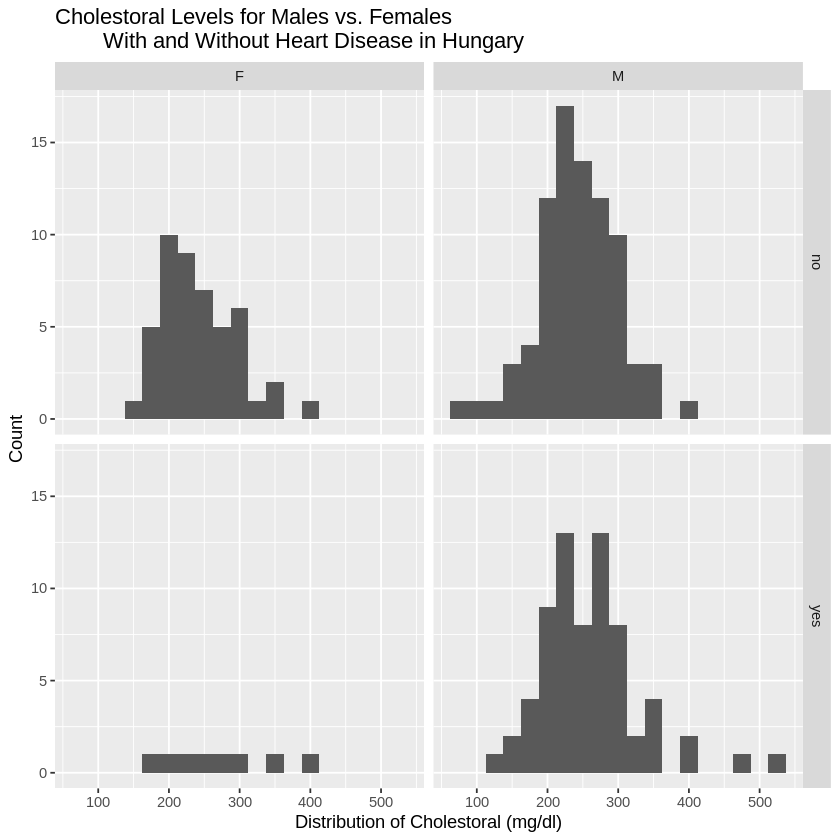

In [165]:
hung_plot_explore <- hung_training |>
    ggplot(aes(x = chol)) +
    geom_histogram(binwidth = 25) +
    facet_grid(diag_heartdis ~ sex) +
    labs(x = "Distribution of Cholestoral (mg/dl)", y = "Count", title = "Cholestoral Levels for Males vs. Females 
        With and Without Heart Disease in Hungary")
hung_plot_explore

## Methods


- how data analysis will be conducted
- what variables/columns to be used
- why?
- describe one way you will visualize results

## Expected Outcomes and Significance

- What do you expect to find?
- What impact could such findings have?
- 
What future questions could this lead to?
